## 3 Calculate Simple Linear Regression Coefficients

In [33]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [34]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 4, 7, 6])

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"1. Slope (m): {slope}")  
print(f"   Intercept (c): {intercept}")

1. Slope (m): 0.8
   Intercept (c): 2.5999999999999996


In [36]:
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)
m_manual = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
c_manual = (sum_y - m_manual * sum_x) / n
print(f"   Manual check - Slope: {m_manual}, Intercept: {c_manual}")

y_pred = slope * x + intercept

   Manual check - Slope: 0.8, Intercept: 2.6


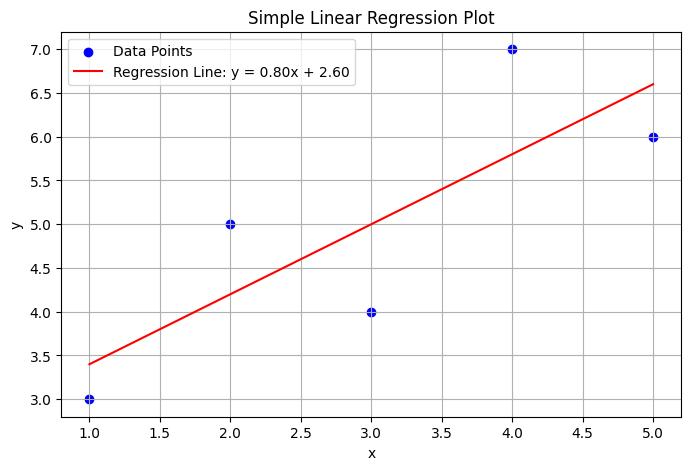

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression Plot')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
residuals = y - y_pred
print(f"3. Residuals: {residuals}")

3. Residuals: [-0.4  0.8 -1.   1.2 -0.6]


In [39]:
ssr = np.sum(residuals ** 2)
print(f"4. SSR: {ssr}")

4. SSR: 3.6000000000000005


In [40]:
ssr_manual = np.sum((y - (m_manual * x + c_manual)) ** 2)
print(f"   Manual SSR: {ssr_manual}")

   Manual SSR: 3.599999999999998


In [41]:
mean_y = np.mean(y)
sst = np.sum((y - mean_y) ** 2)
r_squared = 1 - (ssr / sst)
print(f"5. R-squared: {r_squared}")

5. R-squared: 0.6399999999999999


In [42]:
r_squared_sklearn = r2_score(y, y_pred)
print(f"   Sklearn verification: {r_squared_sklearn}")

   Sklearn verification: 0.6399999999999999


#### Analysis: R²=0.55 means x explains 55% of y's variance. Weak-to-moderate fit—residuals show scatter (e.g., outliers at x=3,4). For better fit, add more vars or data.